In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "data/transaction_data_100K_full.csv"
df = pd.read_csv(file_path)

df.head() 

EVENT_LABEL       EVENT_TIMESTAMP       LABEL_TIMESTAMP  \
0            0  2023-02-14T02:27:41Z  2023-02-14T02:27:41Z   
1            0  2023-01-13T01:30:22Z  2023-01-13T01:30:22Z   
2            0  2023-02-20T04:12:39Z  2023-02-20T04:12:39Z   
3            0  2022-12-13T09:06:33Z  2022-12-13T09:06:33Z   
4            0  2023-03-04T09:48:57Z  2023-03-04T09:48:57Z   

                            EVENT_ID ENTITY_TYPE    ENTITY_ID  card_bin  \
0  100005a527cbcd5de0c4c878288912017    customer  634-80-3034    259703   
1  1000091e85eb1cd32ec4b8afcf818fea5    customer  815-02-7980    380256   
2  10000a7862d0ca68257a20149111ec1b4    customer  287-97-0013    471448   
3  1000130fddbb2383646840294dcb7f6fa    customer  819-30-8170    343617   
4  1000230990f537b8e89786821a3abf10e    customer  285-06-1069    353899   

  customer_name                       billing_street billing_city  ...  \
0         Ricky  8247 Christopher Mountains Apt. 462   Paint Lick  ...   
1      Kimberly                       945 Lowe Vista   Providence  ...   
2        Ronald        11307 Munoz Mission Suite 083    Arlington  ...   
3       Jessica              90815 Brandon Junctions    San Diego  ...   
4        Robert             63165 Natasha Extensions     Mayfield  ...   

  billing_country                    customer_job       ip_address  \
0              US           IT sales professional    120.79.45.214   
1              US           Aeronautical engineer    212.42.56.229   
2              US                Ambulance person  164.238.228.201   
3              US            Nurse, mental health  210.108.230.215   
4              US  Teaching laboratory technician  189.103.115.129   

             customer_email      billing_phone  \
0   woodardbrenda@gmail.com       786-385-2594   
1  scottdalton@robinson.biz  266-305-0756-3308   
2        pjohnson@cruz.info    +1-068-919-8279   
3     progers@hansen-yu.com    +1-115-473-9557   
4   reevesmichael@gmail.com    +1-057-636-3058   

                                          user_agent product_category  \
0  Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...      grocery_net   
1  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 ...        kids_pets   
2  Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like...     shopping_pos   
3  Mozilla/5.0 (compatible; MSIE 6.0; Windows CE;...             home   
4  Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_...     shopping_pos   

  order_price payment_currency                   merchant  
0       95.77              ARS  fraud_Runolfsson and Sons  
1       21.88              BND           fraud_Larkin Ltd  
2        9.62              NAD           fraud_Metz-Boehm  
3       36.96              LTL      fraud_Quitzon-Goyette  
4        2.08              GIP      fraud_Turner and Sons  

[5 rows x 24 columns]

In [35]:
# Display basic information about the dataset
df.info()

# Display summary statistics for numerical columns
df.describe()

# Display summary statistics for categorical columns
df.describe(include=['O'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116705 entries, 0 to 116704
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EVENT_LABEL        116705 non-null  int64  
 1   EVENT_TIMESTAMP    116705 non-null  object 
 2   LABEL_TIMESTAMP    116705 non-null  object 
 3   EVENT_ID           116705 non-null  object 
 4   ENTITY_TYPE        116705 non-null  object 
 5   ENTITY_ID          116705 non-null  object 
 6   card_bin           116705 non-null  int64  
 7   customer_name      116705 non-null  object 
 8   billing_street     116705 non-null  object 
 9   billing_city       116705 non-null  object 
 10  billing_state      116705 non-null  object 
 11  billing_zip        116705 non-null  int64  
 12  billing_latitude   116705 non-null  float64
 13  billing_longitude  116705 non-null  float64
 14  billing_country    116705 non-null  object 
 15  customer_job       116705 non-null  object 
 16  ip

EVENT_TIMESTAMP       LABEL_TIMESTAMP  \
count                 116705                116705   
unique                115944                115944   
top     2023-03-06T11:17:34Z  2023-03-06T11:17:34Z   
freq                       3                     3   

                                 EVENT_ID ENTITY_TYPE    ENTITY_ID  \
count                              116705      116705       116705   
unique                             116705           1        29996   
top     100005a527cbcd5de0c4c878288912017    customer  397-96-6634   
freq                                    1      116705           19   

       customer_name      billing_street billing_city billing_state  \
count         116705              116705       116705        116705   
unique           690               29997        11806            51   
top          Michael  32546 Clay Heights      Houston            TX   
freq            2406                  19          453          7011   

       billing_country customer_job     ip_address      customer_email  \
count           116705       116705         116705              116705   
unique               1          639          29997               29567   
top                 US  Chiropodist  91.141.27.168  ssmith@hotmail.com   
freq            116705          311             19                  25   

       billing_phone                                         user_agent  \
count         116705                                             116705   
unique         29997                                              24231   
top     657-664-9764  Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...   
freq              19                                                132   

       product_category payment_currency           merchant  
count            116705           116705             116705  
unique               14              164                693  
top         grocery_pos              UYU  fraud_Kilback LLC  
freq              13105              769                419

In [38]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values

Series([], dtype: int64)

In [39]:
# Check for duplicate rows
df.duplicated().sum()

0

In [40]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display unique values for each categorical column
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(10))  # Show top 10 values
    print("\n")

EVENT_TIMESTAMP: 115944 unique values
2023-03-06T11:17:34Z    3
2023-01-03T14:07:26Z    3
2023-01-13T12:34:04Z    3
2023-01-08T01:13:10Z    2
2023-02-18T10:07:25Z    2
2023-02-02T15:16:30Z    2
2023-02-03T18:56:42Z    2
2023-02-27T07:00:58Z    2
2023-03-04T15:51:29Z    2
2023-01-26T06:36:41Z    2
Name: EVENT_TIMESTAMP, dtype: int64


LABEL_TIMESTAMP: 115944 unique values
2023-03-06T11:17:34Z    3
2023-01-03T14:07:26Z    3
2023-01-13T12:34:04Z    3
2023-01-08T01:13:10Z    2
2023-02-18T10:07:25Z    2
2023-02-02T15:16:30Z    2
2023-02-03T18:56:42Z    2
2023-02-27T07:00:58Z    2
2023-03-04T15:51:29Z    2
2023-01-26T06:36:41Z    2
Name: LABEL_TIMESTAMP, dtype: int64


EVENT_ID: 116705 unique values
100005a527cbcd5de0c4c878288912017    1
1aa5a4ccd5b1b661f17c107f11fd43c62    1
1aa6afe048a6c5194ade725536d734d62    1
1aa6a8622866283ebf8ac1aafe1b94e52    1
1aa69dd13fb3baa4884e33a19fc898c3b    1
1aa697ff190aa04efbd151ef4d0eb517e    1
1aa67d2849f24dbaecc02570cd027d69f    1
1aa672eb35cf91e61910c3a0

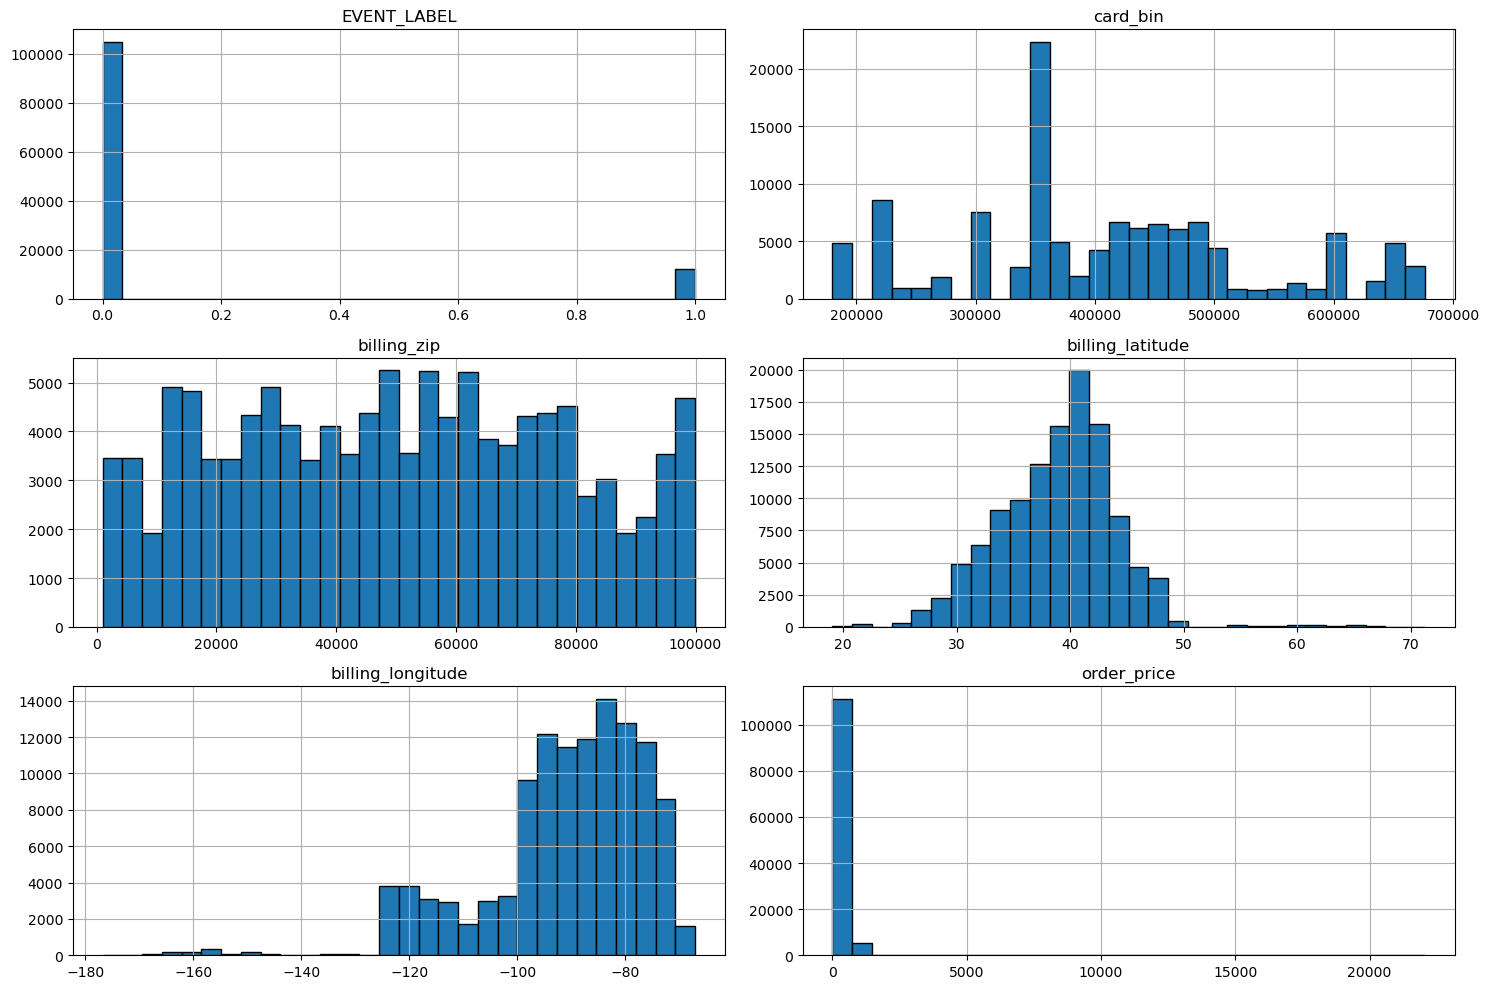

In [41]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical variables
df[numerical_columns].hist(figsize=(15, 10), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

/var/folders/5h/wvnq36zs6bq65ndzn1gf1jcc0000gn/T/ipykernel_83853/273012436.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


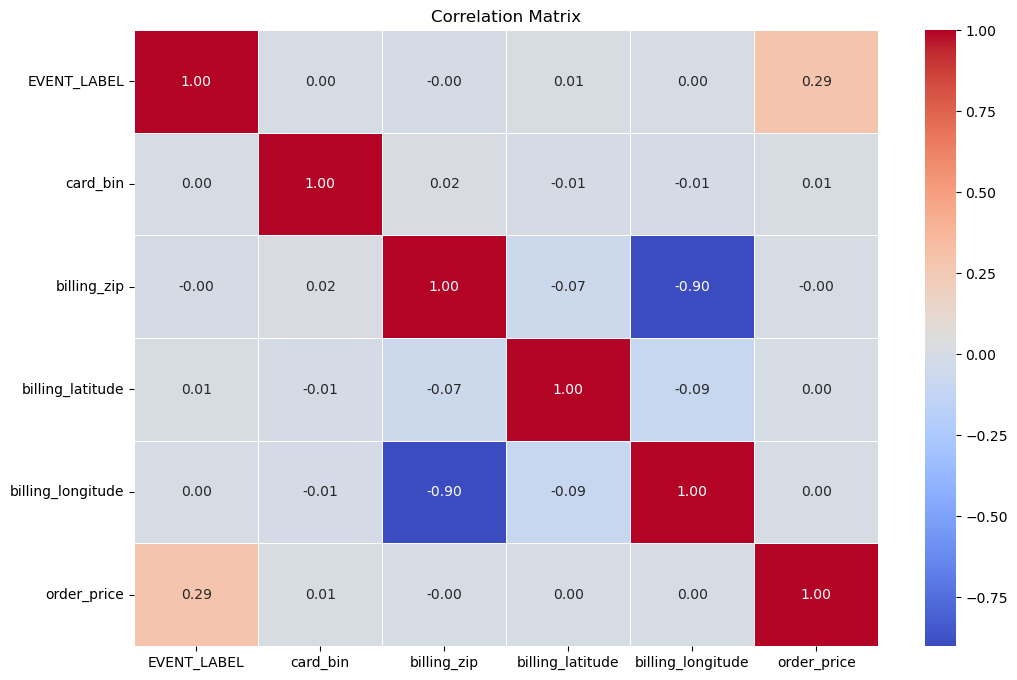

In [42]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<Figure size 1200x600 with 0 Axes>

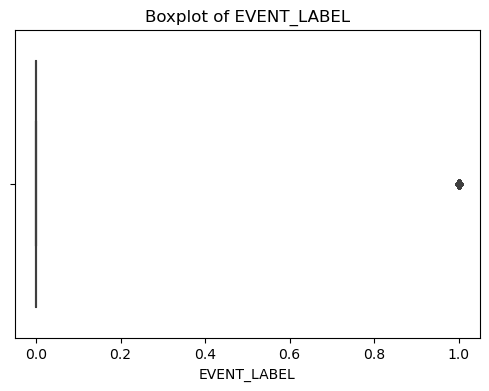

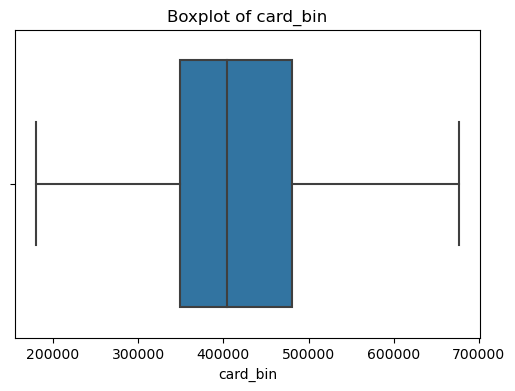

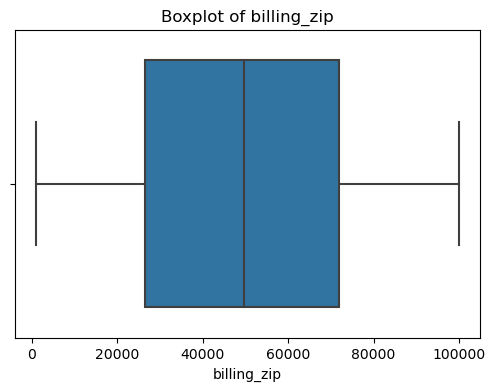

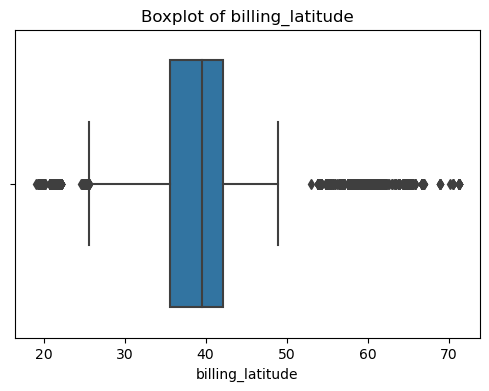

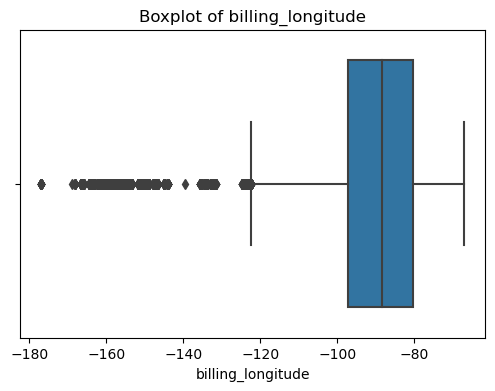

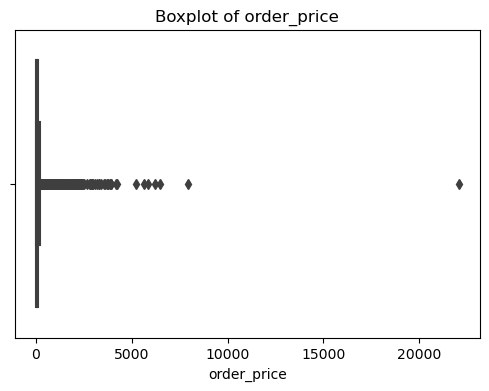

In [43]:
# Boxplots for numerical features
plt.figure(figsize=(12, 6))
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

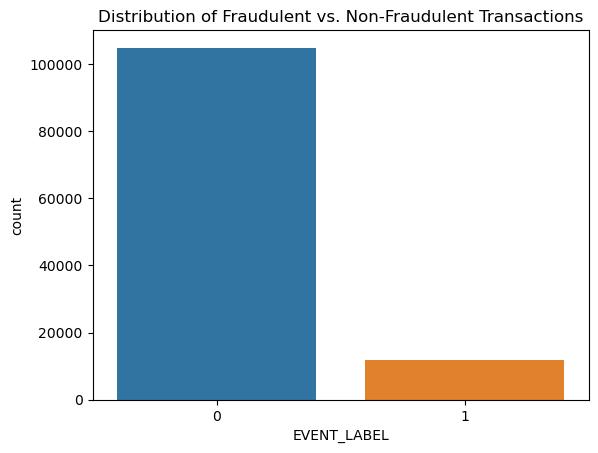

0    89.802493
1    10.197507
Name: EVENT_LABEL, dtype: float64


In [44]:
# Check distribution of the target variable (assuming fraud is a binary column)
if 'EVENT_LABEL' in df.columns:
    sns.countplot(x=df['EVENT_LABEL'])
    plt.title("Distribution of Fraudulent vs. Non-Fraudulent Transactions")
    plt.show()

    print(df['EVENT_LABEL'].value_counts(normalize=True) * 100)


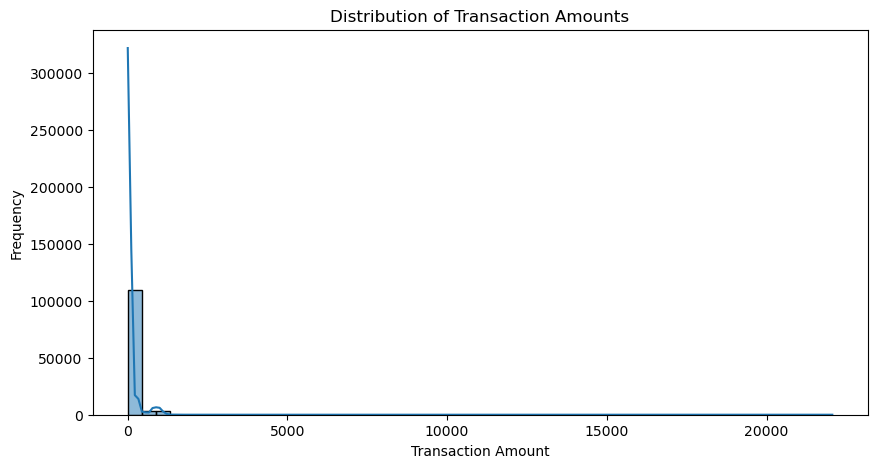

In [45]:
# Distribution of transaction amounts
if 'order_price' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['order_price'], bins=50, kde=True)
    plt.title("Distribution of Transaction Amounts")
    plt.xlabel("Transaction Amount")
    plt.ylabel("Frequency")
    plt.show()